### Dataset: 2019 and 2020 stackoverflow surveys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#dataset 2020 Survey df
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

In [2]:
#dataset 2017 Survey df2
df2 = pd.read_csv('../developer_survey_2019/survey_results_public.csv')
schema2 = pd.read_csv('../developer_survey_2019/survey_results_schema.csv')


In [3]:
#create list for common columns of two surveys 
list2020=list(df.columns)
list2019=list(df2.columns)
sharedcols=list(set(list2020).intersection(list2019))
print(sharedcols)

['PlatformDesireNextYear', 'Age1stCode', 'CurrencyDesc', 'Trans', 'JobSat', 'EdLevel', 'Gender', 'JobSeek', 'UndergradMajor', 'Country', 'PlatformWorkedWith', 'OpSys', 'WelcomeChange', 'Hobbyist', 'ConvertedComp', 'PurchaseWhat', 'DatabaseWorkedWith', 'SOPartFreq', 'YearsCodePro', 'Sexuality', 'DevType', 'LanguageDesireNextYear', 'SOComm', 'Age', 'MiscTechWorkedWith', 'YearsCode', 'OrgSize', 'JobFactors', 'CompTotal', 'CurrencySymbol', 'WorkWeekHrs', 'SurveyEase', 'LanguageWorkedWith', 'Ethnicity', 'CompFreq', 'SurveyLength', 'MainBranch', 'DatabaseDesireNextYear', 'Employment', 'SOVisitFreq', 'MiscTechDesireNextYear', 'SOAccount', 'Respondent']


In [4]:
#create sub dataframe with shared columns of 2019 and 2020
df_sub=df[sharedcols]
df2_sub=df2[sharedcols]


In [5]:
#remove rows with missing values
df_sub_clean=df_sub.dropna(axis=0,how='any')
df2_sub_clean=df2_sub.dropna(axis=0,how='any')

## Q1. What is the minorty and women percentage in stackoverflow? Is there any change from 2019 to 2020? 
* First, all non-binary gender groups are merged and labeled with 2. Women labelled as 1 and man as 0.
* Then, percentages of these three groups are calculated to represent gender dominance for both 2019 and 2020 survey data.
* 2019 and 2020 survey participants are compared with these three gender groups in a bar plot.

### A1: Only 4-5% of stackoverflow community is women and non-binary group is less than 1 %! There is only 0.6 and 0.2 % increase from 2019 to 2020 for women and non-binary group, respectively.
(if we assume that surveyh participants represent the whole stackoverflow community)


In [6]:
df_sub_clean.Gender.unique()

array(['Man', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [7]:
#List of column names of the categorical variables
L_Gender=list(df_sub_clean.Gender.unique())
Dict_Gender={'Man':0, 'Woman':1,
       'Non-binary, genderqueer, or gender non-conforming':2,
       'Woman;Non-binary, genderqueer, or gender non-conforming':2,
       'Man;Non-binary, genderqueer, or gender non-conforming':2,
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming':2,
       'Woman;Man':2}

df_sub_clean=df_sub_clean.replace({'Gender':Dict_Gender})
df2_sub_clean=df2_sub_clean.replace({'Gender':Dict_Gender})

Text(1.7, 10, '0.6-0.8 %')

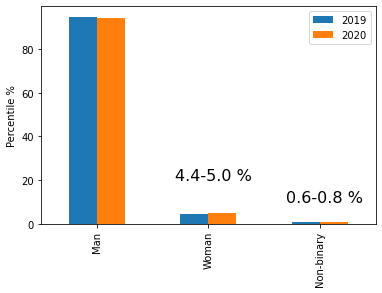

In [8]:
Gender2019=100*df2_sub_clean.groupby(['Gender']).size()/df2_sub_clean.groupby(['Gender']).size().sum()
Gender2020=100*df_sub_clean.groupby(['Gender']).size()/df_sub_clean.groupby(['Gender']).size().sum()
dfGender = pd.DataFrame({'2019': Gender2019.values,'2020': Gender2020.values}, index=['Man','Woman','Non-binary'])
ax = dfGender.plot.bar()
ax.set_ylabel('Percentile %')
ax.text(0.7, 20,str(Gender2019.values[1].round(1))+'-'+str(Gender2020.values[1].round(1))+' %', fontsize=16)
ax.text(1.7, 10,str(Gender2019.values[2].round(1))+'-'+str(Gender2020.values[2].round(1))+' %', fontsize=16)

### Q2. According to Education Level which group has the highest average of Job Stasifaction? Has it changed from 2019 to 2020?
As it can be seen from Bar plot below people with Doctoral degree has the highest jib satisfaction and their job satisfaction has increased from 2019 to 2020. Also the group with professional degree has the lowest job satisfacition in both 2019 and 2020. 

*  First, categorical column JobSatisfaction changed to Numeric with rate of satisfaction from -2 (Very dissatisfied) to 2 (Very Satisfied). 
* Then, 2019 and 2020 survey participants are compared in a bar plot according to Education Level. 

### A2. According to Education Level which group has the highest average of Job Stasifaction? Has it changed from 2019 to 2020?


In [9]:
L_JobSat=list(df_sub_clean.JobSat.unique())
Dict_JobSat={'Very dissatisfied':-2,'Slightly dissatisfied':-1,'Neither satisfied nor dissatisfied':0,
             'Slightly satisfied':1,'Very satisfied':2}

df_sub_clean=df_sub_clean.replace({'JobSat':Dict_JobSat})
df2_sub_clean=df2_sub_clean.replace({'JobSat':Dict_JobSat})


In [10]:
df_sub_clean.JobSat.astype(int)
EdLevel2020=df_sub_clean.groupby(['EdLevel']).mean()['JobSat'].sort_values(ascending=False)
df2_sub_clean.JobSat.astype(int)
EdLevel2019=df2_sub_clean.groupby(['EdLevel']).mean()['JobSat'].sort_values(ascending=False)

Text(0, 0.5, 'Job Satisfaction')

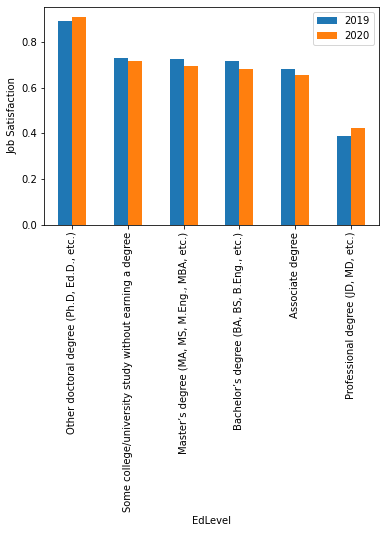

In [11]:
dfEdL = pd.DataFrame({'2019': EdLevel2019.values,
                   '2020': EdLevel2020.values}, index=EdLevel2019.index)
ax = dfEdL.plot.bar()
ax.set_ylabel('Job Satisfaction')

### Q3. Has the top 10 Countries changed from 2019 to 2020? What is the percentage of the rest of the countries? 

* First, cleaned dataframe is grouped by Country and top 10 countries percentages are calculated. 
* Then, 2019 and 2020 survey participants are compared in a bar plot according to Country of their origin. 
* The rest of the countries (other than top 10) are summed and sum is annotated in the bar plot ofr both 2019 and 2020.

### A3. 1.rank country is USA in both 2019 and 2020; however, there is a 3% decrease from 2019 to 2020. Other top 10 countries are increasing besides from UK (2nd). There is still a big difference of the stackoverflow profiles from other countries. Total nuumber of Top 3 countries is still 10% higher than total of the all the other countries. 


In [12]:
#Gender2019=100*df2_sub_clean.groupby(['Gender']).size()/df2_sub_clean.groupby(['Gender']).size().sum()
Country2019_others=(100*df2_sub_clean.groupby(['Country']).size()/df2_sub_clean.groupby(['Country']).size().sum()).sort_values(ascending=False)[10:]
Country2019=(100*df2_sub_clean.groupby(['Country']).size()/df2_sub_clean.groupby(['Country']).size().sum()).sort_values(ascending=False)[:10]
Country2020_others=(100*df_sub_clean.groupby(['Country']).size()/df_sub_clean.groupby(['Country']).size().sum()).sort_values(ascending=False)[10:]
Country2020=(100*df_sub_clean.groupby(['Country']).size()/df_sub_clean.groupby(['Country']).size().sum()).sort_values(ascending=False)[:10]


Text(5.7, 20, 'Other Countries\n Total:34.8-36.2 %')

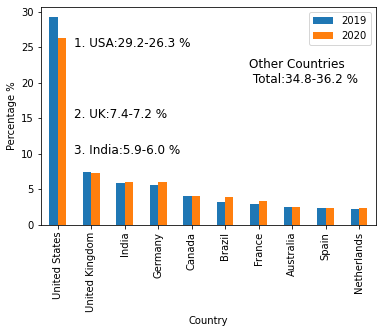

In [13]:
dCountry = pd.DataFrame({'2019': Country2019.values,'2020': Country2020.values}, index=Country2019.index)
ax = dCountry.plot.bar()
ax.set_ylabel('Percentage %')
ax.text(0.5, 25,'1. USA:'+str(Country2019.values[0].round(1))+'-'+str(Country2020.values[0].round(1))+' %', fontsize=12)
ax.text(0.5, 15,'2. UK:'+str(Country2019.values[1].round(1))+'-'+str(Country2020.values[1].round(1))+' %', fontsize=12)
ax.text(0.5, 10,'3. India:'+str(Country2019.values[2].round(1))+'-'+str(Country2020.values[2].round(1))+' %', fontsize=12)

ax.text(5.7, 20,'Other Countries\n Total:'+str(Country2019_others.sum().round(1))+'-'+str(Country2020_others.sum().round(1))+' %', fontsize=12)